In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

# Visualize the data using a scatter plot.  From the plot determine an appropriate value of k.

In [2]:
data = pd.read_csv("C:\\Users\\fishk\\Downloads\\data.csv")    # Read the data
data.head()


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


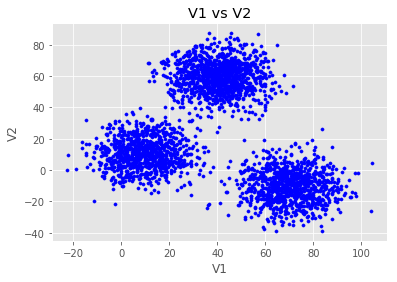

In [4]:
x = data.V1
y = data.V2

plt.scatter(x,y, s = 10, color ='blue')
plt.title('V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [ ]:
#from the plot it is clear 3 clusters were formed so the value of k is 3

# Create multiple kMeans models from sklearn library using the values of k from 1 to 10

In [18]:
X = np.array(list(zip(data.V1, data.V2))).reshape(len(data.V1), 2)

[[40.61135842 22.86214103]]
[0 0 0 ... 0 0 0]


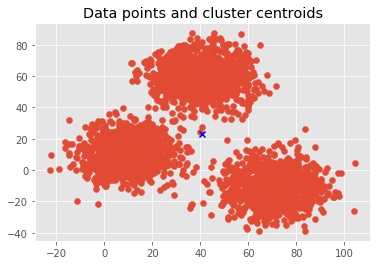

[[ 26.97904841  38.42510047]
 [ 69.49144971 -10.10803707]]
[0 0 0 ... 1 1 1]


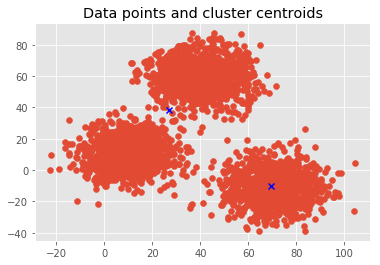

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]
[2 2 2 ... 0 0 0]


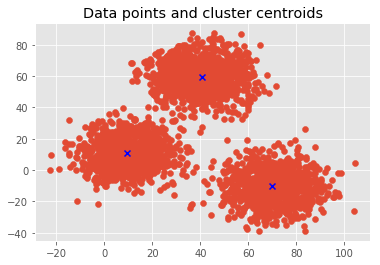

[[ 69.92418447 -10.11964119]
 [ 48.48491299  60.32465713]
 [  9.41312839  10.61562231]
 [ 32.25733899  58.91228106]]
[2 2 2 ... 0 0 0]


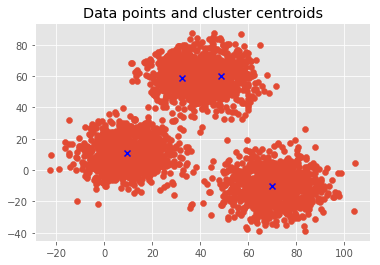

[[ 48.48491299  60.32465713]
 [ 64.14597442  -4.25583804]
 [  9.35029477  10.63837167]
 [ 75.86116482 -16.24064579]
 [ 32.25733899  58.91228106]]
[2 2 2 ... 1 3 3]


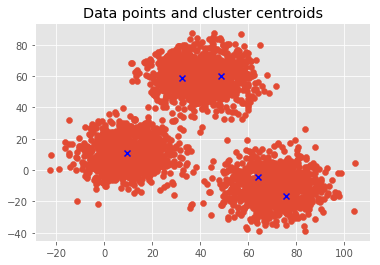

[[ 31.81784541  60.89093102]
 [ 61.94893133  -9.87064002]
 [  1.56577513   7.37588055]
 [ 78.63561484 -10.3916271 ]
 [ 16.9134581   13.86513175]
 [ 48.04952108  58.875496  ]]
[2 4 2 ... 1 3 1]


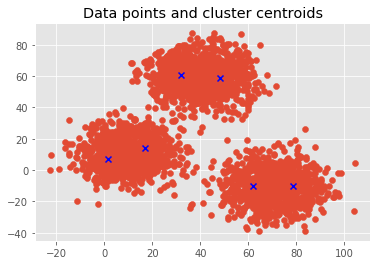

[[ 75.85186281 -16.29958452]
 [ 45.96326532  50.48359905]
 [  1.44892544   9.35845583]
 [ 29.74845918  60.03296247]
 [ 64.31167922  -4.26828381]
 [ 46.07938087  67.91592602]
 [ 17.66955307  12.04049844]]
[2 6 2 ... 4 0 0]


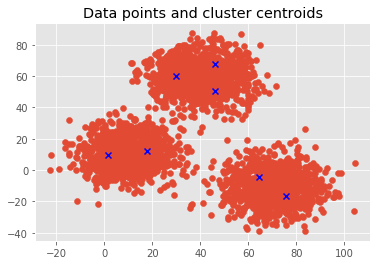

[[ 29.72242375  60.78481354]
 [ 67.17674956  -0.26389328]
 [ 16.71462468  13.71772383]
 [ 46.77256916  67.62841561]
 [ 80.54888463 -13.61727371]
 [ 61.72738263 -17.93064132]
 [  1.47883001   7.33488314]
 [ 45.35937217  50.43856484]]
[6 2 6 ... 5 4 5]


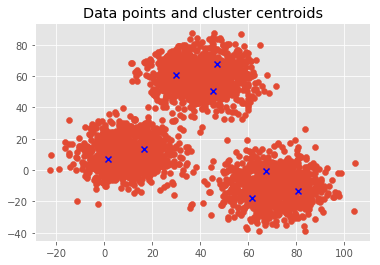

[[ 45.34494174  50.36879784]
 [ 80.87575957 -13.25348605]
 [  0.11258074   5.40605804]
 [ 46.77256916  67.62841561]
 [ 62.2518443  -18.18029843]
 [ 29.77557777  60.89536541]
 [ 18.85218809   5.85690955]
 [ 66.99865818  -0.3306027 ]
 [  9.69017782  21.26455673]]
[2 8 2 ... 4 1 4]


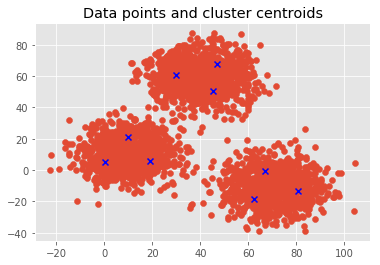

[[ 3.03964464e+01  6.59543092e+01]
 [ 6.69986582e+01 -3.30602697e-01]
 [-3.58967360e-04  5.40839362e+00]
 [ 9.80121920e+00  2.06072991e+01]
 [ 8.08757596e+01 -1.32534860e+01]
 [ 3.44665568e+01  5.06305808e+01]
 [ 4.70499793e+01  6.73982152e+01]
 [ 6.22518443e+01 -1.81802984e+01]
 [ 1.89281903e+01  5.28806107e+00]
 [ 5.04199942e+01  5.15727136e+01]]
[2 3 2 ... 7 4 7]


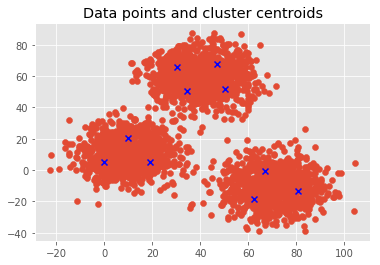

In [22]:
K = range(1,11)
for k in K:
    
    kmeans = KMeans(n_clusters= k, max_iter=300).fit(X)
    y_kmeans = kmeans.fit_predict(X)

    # Get the cluster centroids
    print(kmeans.cluster_centers_)

    # Get the cluster labels
    print(kmeans.labels_)

    plt.scatter(X[:, 0], X[:, -1])

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', marker='x')

    plt.title('Data points and cluster centroids')
    plt.show()

    


# Calculate the within sum of squares for each value of k 

In [24]:
from scipy.spatial.distance import cdist

In [28]:
wssList = [] #creating a list will make appending easier instaed of having to do it one value by one.
wss_calculation = 0

I = range(1,11)
for i in I:
    kmeanModel = KMeans(n_clusters= i).fit(X)
    kmeanModel.fit(X)
    wss_calculation = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1))
    wssList.append(wss_calculation)
    print(i, '=', wss_calculation)

1 = 118573.04301584774
2 = 74779.93285644594
3 = 38012.70271413337
4 = 35322.0325230719
5 = 33006.921544970624
6 = 30782.48520765618
7 = 28658.703054489033
8 = 26840.36737228163
9 = 25210.526156830263
10 = 24255.840411135414


# Use the value in 3 above to determine the most suitable value for k using the elbow method

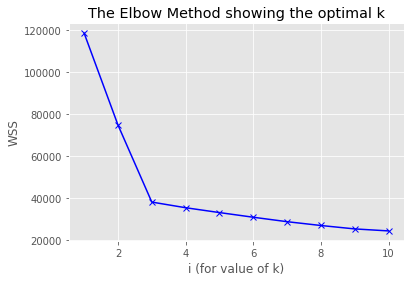

In [29]:
plt.plot(I, wssList, 'bx-')
plt.xlabel('i (for value of k)')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
#from the graph we see that the elbow is between 2 and 4, thus k=3

# Use the k above to create a final kMeans model using the sklearn library

In [31]:
kmeans = KMeans(n_clusters=3, max_iter=300).fit(X)
print(kmeans.cluster_centers_)  
print(kmeans.labels_)

[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]
[2 2 2 ... 1 1 1]


# Visualize the clusters from 5 above using a scatter plot. Ensure to show the clusters, their centroids and assignment of each point to a cluster. 

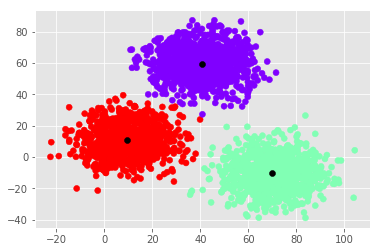

In [32]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 